In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [80]:
df_up = pd.read_csv("C:/Users/maria/Desktop/Segundo_periodo/ING_CARACT/data_proyecto2.csv")
df_up

,nombre,Fecha,data
0,x1,01/01/2006,6.05
1,x1,02/01/2006,4.72
2,x1,03/01/2006,4.46
3,x1,04/01/2006,34.74
4,x1,05/01/2006,1.91
...,...,...,...
6566,x2,27/12/2014,-13.30
6567,x2,28/12/2014,16.20
6568,x2,29/12/2014,5.10
6569,x2,30/12/2014,4.90


In [81]:
df = df_up.pivot( index= "Fecha", columns="nombre", values = "data").reset_index()
df.columns.name = None
df

,Fecha,x1,x2
0,01/01/2006,6.05,9.22
1,01/01/2007,7.72,5.12
2,01/01/2008,1.29,2.50
3,01/01/2009,11.30,10.70
4,01/01/2010,6.40,3.40
...,...,...,...
3282,31/12/2010,15.21,9.00
3283,31/12/2011,14.15,NaN
3284,31/12/2012,1.72,NaN
3285,31/12/2013,0.92,8.40


In [82]:
print(f"Sesgo de x1 = {df['x1'].skew()}")
print(f"Kurtosis de x1 = {df['x1'].kurt()}")
print(f"Sesgo de x2 = {df['x2'].skew()}")
print(f"Kurtosis de x2 = {df['x2'].kurt()}")

Sesgo de x1 = 2.329477749561767
Kurtosis de x1 = 7.402126244451516
Sesgo de x2 = 2.3204673702385916
Kurtosis de x2 = 8.65277617471737


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

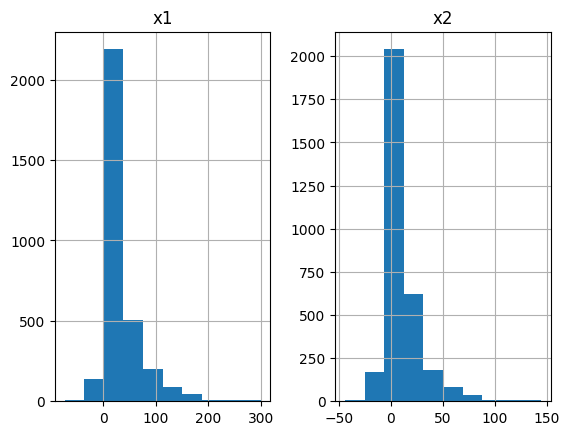

In [83]:
df.hist()

In [84]:
pt = PowerTransformer()
pt.fit(df[["x1", "x2"]])
print(pt.lambdas_)

[0.73622246 0.81018161]


In [85]:
transformed_data = pt.transform(df[["x1", "x2"]])
df[["x1", "x2"]] = transformed_data
df

,Fecha,x1,x2
0,01/01/2006,-0.620684,0.050542
1,01/01/2007,-0.557060,-0.189718
2,01/01/2008,-0.832110,-0.359567
3,01/01/2009,-0.430498,0.132381
4,01/01/2010,-0.607047,-0.299142
...,...,...,...
3282,31/12/2010,-0.303020,0.038191
3283,31/12/2011,-0.336689,NaN
3284,31/12/2012,-0.809947,NaN
3285,31/12/2013,-0.852077,0.004239


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

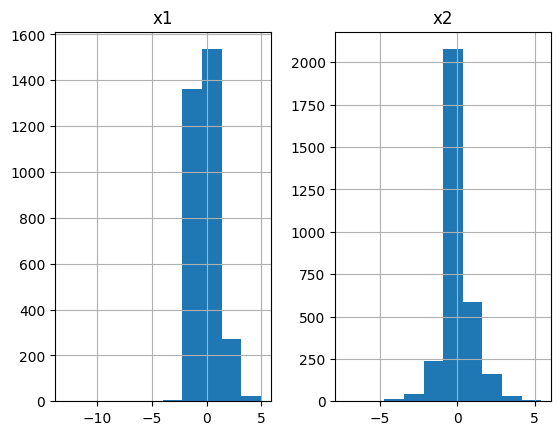

In [86]:
df.hist()

<Axes: >

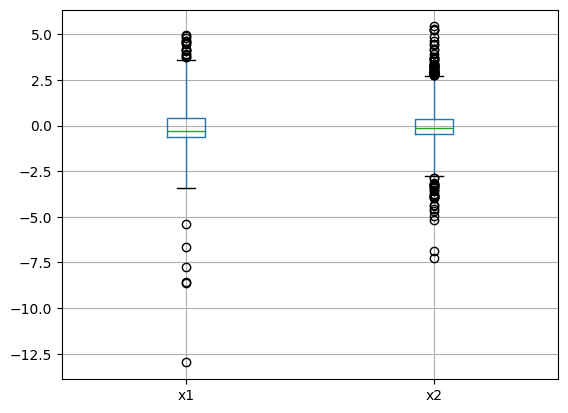

In [87]:
df.boxplot(whis=3)

In [88]:
valores_atipicos_x1 = df["x1"][(df["x1"] - df["x1"].mean()).abs() > 6 * df["x1"].std()]
print(valores_atipicos_x1.shape)
valores_atipicos_x1

(5,)


350     -7.729793
662     -8.554963
794    -12.978954
986     -8.627709
2301    -6.679403
Name: x1, dtype: float64

In [89]:
df.loc[valores_atipicos_x1.index,'x1']=np.nan
df.loc[valores_atipicos_x1.index]

,Fecha,x1,x2
350,04/03/2014,NaN,-0.241037
662,07/02/2011,NaN,0.579581
794,08/05/2008,NaN,-0.130065
986,10/02/2011,NaN,1.003272
2301,22/04/2012,NaN,-0.306392


In [90]:
valores_atipicos_x2 = df["x2"][(df["x2"] - df["x2"].mean()).abs() > 6 * df["x2"].std()]
print(valores_atipicos_x2.shape)
valores_atipicos_x2

(2,)


517    -6.867584
2760   -7.240670
Name: x2, dtype: float64

In [91]:
df.loc[valores_atipicos_x2.index,'x2']=np.nan
df.loc[valores_atipicos_x2.index]

,Fecha,x1,x2
517,05/10/2010,2.265156,NaN
2760,26/07/2012,-0.689721,NaN


In [92]:
m1 = df['x1'].median()
m2 = df['x2'].median()
m1, m2

(-0.30302047181559116, -0.13607696169611339)

In [93]:
df['x1'].fillna(m1, inplace=True)
df['x2'].fillna(m2, inplace=True)
df.isna().sum()

C:\Users\maria\AppData\Local\Temp\ipykernel_27424\320285947.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\maria\AppData\Local\Temp\ipykernel_27424\320285947.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Fecha    0
x1       0
x2       0
dtype: int64

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

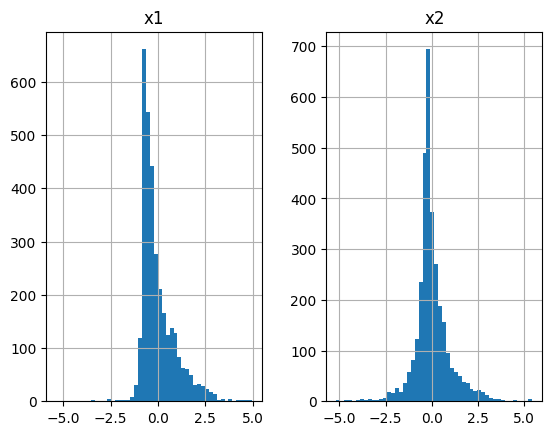

In [94]:
df.hist(bins=50)

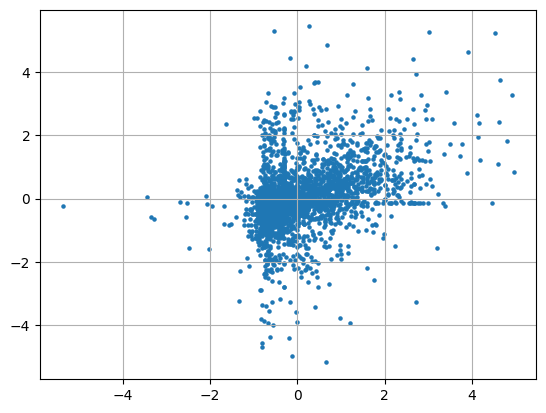

In [95]:
plt.scatter(df['x1'],df['x2'],s=5)
plt.grid()

In [96]:
from sklearn.preprocessing import KBinsDiscretizer

In [97]:
k=2
discretizador=KBinsDiscretizer(strategy='kmeans',n_bins=k,encode='ordinal')
df['kmeans']=discretizador.fit_transform(df[['x1']])
df

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning:

In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.



,Fecha,x1,x2,kmeans
0,01/01/2006,-0.620684,0.050542,0.0
1,01/01/2007,-0.557060,-0.189718,0.0
2,01/01/2008,-0.832110,-0.359567,0.0
3,01/01/2009,-0.430498,0.132381,0.0
4,01/01/2010,-0.607047,-0.299142,0.0
...,...,...,...,...
3282,31/12/2010,-0.303020,0.038191,0.0
3283,31/12/2011,-0.336689,-0.136077,0.0
3284,31/12/2012,-0.809947,-0.136077,0.0
3285,31/12/2013,-0.852077,0.004239,0.0


In [98]:
df.kmeans.unique()

array([0., 1.])

In [99]:
df_x1_0 = df[(df["kmeans"] == 0)][['Fecha', 'x1']]
df_x1_1 = df[(df["kmeans"] == 1)][['Fecha', 'x1']]
df_x2_0 = df[(df["kmeans"] == 0)][['Fecha', 'x2']]
df_x2_1 = df[(df["kmeans"] == 1)][['Fecha', 'x2']]


In [100]:
df_x1_0

,Fecha,x1
0,01/01/2006,-0.620684
1,01/01/2007,-0.557060
2,01/01/2008,-0.832110
3,01/01/2009,-0.430498
4,01/01/2010,-0.607047
...,...,...
3282,31/12/2010,-0.303020
3283,31/12/2011,-0.336689
3284,31/12/2012,-0.809947
3285,31/12/2013,-0.852077


In [101]:
df_x1_1

,Fecha,x1
53,01/06/2014,1.025381
56,01/07/2008,0.728980
57,01/07/2009,0.608685
58,01/07/2010,1.126398
61,01/07/2013,0.593511
...,...,...
3270,31/10/2007,0.573120
3273,31/10/2010,0.524928
3274,31/10/2011,0.634943
3276,31/10/2013,0.544837


In [102]:
df_x2_0

,Fecha,x2
0,01/01/2006,0.050542
1,01/01/2007,-0.189718
2,01/01/2008,-0.359567
3,01/01/2009,0.132381
4,01/01/2010,-0.299142
...,...,...
3282,31/12/2010,0.038191
3283,31/12/2011,-0.136077
3284,31/12/2012,-0.136077
3285,31/12/2013,0.004239


In [103]:
df_x2_1

,Fecha,x2
53,01/06/2014,0.887167
56,01/07/2008,0.303014
57,01/07/2009,0.055021
58,01/07/2010,1.295208
61,01/07/2013,-0.285397
...,...,...
3270,31/10/2007,0.583021
3273,31/10/2010,0.605567
3274,31/10/2011,-0.136077
3276,31/10/2013,0.148724


In [104]:
df_x2_1['Fecha'] = pd.to_datetime(df_x2_1['Fecha'], format='%d/%m/%Y')
print(df_x2_1["Fecha"], df_x2_1['Fecha'].min(), df_x2_1['Fecha'].max())

53     2014-06-01
56     2008-07-01
57     2009-07-01
58     2010-07-01
61     2013-07-01
          ...    
3270   2007-10-31
3273   2010-10-31
3274   2011-10-31
3276   2013-10-31
3277   2014-10-31
Name: Fecha, Length: 764, dtype: datetime64[ns] 2006-05-10 00:00:00 2014-12-16 00:00:00


In [105]:
df_x2_1.sort_values(by='Fecha', inplace=True)
df_x2_1["Fecha"]

1008   2006-05-10
477    2006-06-05
801    2006-06-08
909    2006-06-09
1017   2006-06-10
          ...    
2897   2014-10-27
3005   2014-10-28
3205   2014-10-30
3277   2014-10-31
1727   2014-12-16
Name: Fecha, Length: 764, dtype: datetime64[ns]

In [107]:
import plotly.express as px

# Crear un gráfico de línea
fig = px.line(df_x2_1, x="Fecha", y="x2", title="Serie de Tiempo", category_orders={"Fecha": df_x2_1["Fecha"].unique()})
fig.show()

In [111]:
media_movil = pd.Series(df_x2_1).rolling(window=1).mean()
#print(media_movil)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().